# Applications IA en formation

Dans cette exploration des données, nous cherchons à analyser les différentes relations présentes dans le jeu de données, et à explorer leur distribution à l'aide de diagrammes et de statistiques descriptives.

## Étape 1 : Chargement des données
Dans cette première étape, nous allons charger les données et observer leur structure pour mieux comprendre les colonnes disponibles.

In [195]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'applis-ia.csv'

# Load the CSV, handling multiline fields and quote character
data = pd.read_csv(file_path, delimiter=',', quotechar='"')

# Take a look
data.head()


,Nom,résumé,relation
0,ChatGPT,L'IA conversationnelle référence pour trouver...,"A1, A2, A3, B1, B2, B3, C1, C2, C3"
1,MidJourney,L'IA d'imagerie de référence. Décrivez le visu...,"A1, A3, B2, B3"
2,LLaMa Chat,Le ChatGPT de Facebook,"A1, A3, B1, B2, B3"
3,Automorphic,Plateforme axée sur la protection de la vie pr...,C1
4,Stable Doodle,NaN,C1


## Étape 2 : Nettoyage des données
Ici, nous nettoyons les données en supprimant les colonnes inutiles, puis nous filtrons les lignes en fonction des relations spécifiques que nous souhaitons analyser.


In [196]:
# Remove useless column
data_cleaned = data.drop(columns=['résumé'])

# Count the total number of rows
total_rows = len(data_cleaned)

# Count rows where "relation" column contains only "C1"
rows_with_only_C1 = data_cleaned[data_cleaned['relation'].str.strip() == 'C1']
count_only_C1 = len(rows_with_only_C1)

# Count rows where "relation" column contains only "C3"
rows_with_only_C3 = data_cleaned[data_cleaned['relation'].str.strip() == 'C3']
count_only_C3 = len(rows_with_only_C3)

# Remove rows where "relation" contains only "C1", only "C2" or only "C3"
filtered_data = data_cleaned[~data_cleaned['relation'].str.strip().isin(['C1', 'C2', 'C3'])]

filtered_data.head()

,Nom,relation
0,ChatGPT,"A1, A2, A3, B1, B2, B3, C1, C2, C3"
1,MidJourney,"A1, A3, B2, B3"
2,LLaMa Chat,"A1, A3, B1, B2, B3"
5,AI Companion,A1
7,Heygen,A3


## Étape 3 : Comptage des occurrences des relations
Nous allons séparer les relations multiples dans la colonne `relation`, puis compter combien de fois chaque relation (A1, A2, A3, B1, B2, B3) apparaît.

In [197]:
# Split the 'relation' column by commas to get individual relations
filtered_data = filtered_data.copy()  # Make an explicit copy to avoid SettingWithCopyWarning
filtered_data['relation'] = filtered_data['relation'].str.split(', ')

# Explode the list to have each relation as a separate row
exploded_data = filtered_data.explode('relation')

# Clean spaces around relations
exploded_data['relation'] = exploded_data['relation'].str.strip()

# Focus on valid relations
valid_relations = ['A1', 'A2', 'A3', 'B1', 'B2', 'B3']
exploded_data = exploded_data[exploded_data['relation'].isin(valid_relations)]

# Count occurrences number for any relation
relation_counts = exploded_data['relation'].value_counts()
print(relation_counts)

# Describe stats
basic_stats = relation_counts.describe()
print(basic_stats)

# Add IQR (Interquartile range)
iqr = basic_stats['75%'] - basic_stats['25%']
print(f"IQR: {iqr}")

# Calculate Skewness (Asymétrie) et Kurtosis (Aplatissement)
skewness = relation_counts.skew()
kurtosis = relation_counts.kurtosis()

# Display results
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

relation
A3    106
A1     74
A2     43
B3     27
B1     26
B2     20
Name: count, dtype: int64
count      6.000000
mean      49.333333
std       33.950945
min       20.000000
25%       26.250000
50%       35.000000
75%       66.250000
max      106.000000
Name: count, dtype: float64
IQR: 40.0
Skewness: 1.131757412246252
Kurtosis: 0.05571519892849519


## Étape 4 : Boîte à moustaches des fréquences des relations
Nous allons représenter la distribution des fréquences des relations à l'aide d'une boîte à moustaches et ajouter des annotations pour indiquer la moyenne, la médiane, et les quartiles.

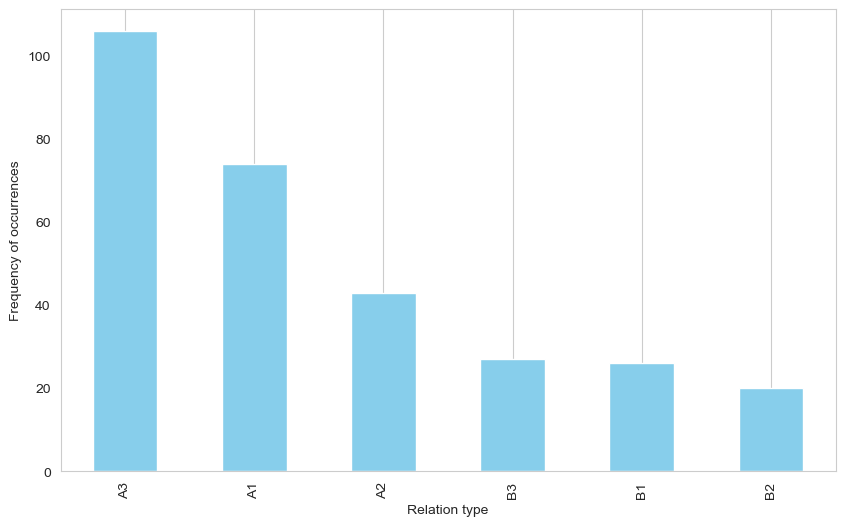

In [198]:
# Create a bar plot for the relation occurrences
plt.figure(figsize=(10, 6))

# Plot the histogram of the relation frequencies
relation_counts.plot(kind='bar', color='skyblue')

# Add labels (please note titles will be shown in the article body)
plt.xlabel('Relation type')
plt.ylabel('Frequency of occurrences')

# Display the plot
plt.grid(axis='y')
plt.show()

## Étape 5 - Boîte à moustaches des fréquences des relations
Nous allons représenter la distribution des fréquences des relations à l'aide d'une boîte à moustaches et ajouter des annotations pour indiquer la moyenne, la médiane, et les quartiles.


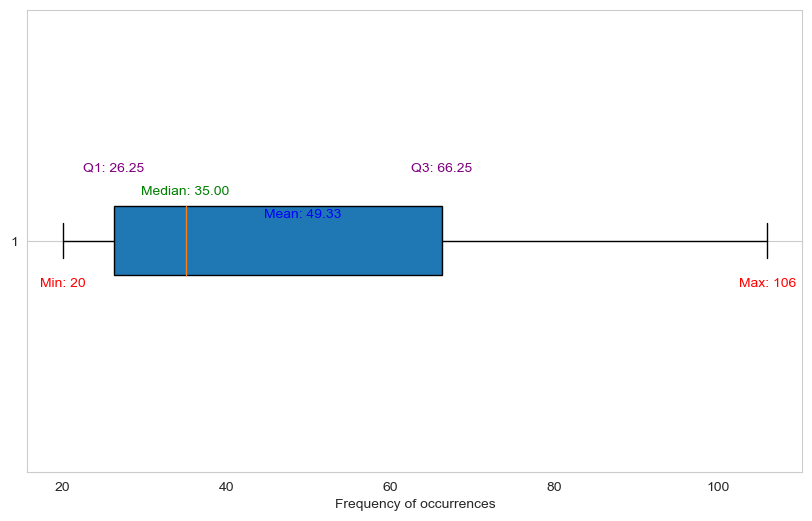

In [199]:
# Calculate basic statistics
mean_val = relation_counts.mean()
median_val = relation_counts.median()
q1_val = relation_counts.quantile(0.25)
q3_val = relation_counts.quantile(0.75)
min_val = relation_counts.min()
max_val = relation_counts.max()

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(relation_counts.values, vert=False, patch_artist=True)

# Add labels
plt.xlabel('Frequency of occurrences')

# Add grid for readability
plt.grid(axis='x')

# Annotate the plot with statistics
plt.text(mean_val, 1.05, f'Mean: {mean_val:.2f}', ha='center', color='blue')
plt.text(median_val, 1.1, f'Median: {median_val:.2f}', ha='center', color='green')
plt.text(q1_val, 1.15, f'Q1: {q1_val:.2f}', ha='center', color='purple')
plt.text(q3_val, 1.15, f'Q3: {q3_val:.2f}', ha='center', color='purple')
plt.text(min_val, 0.9, f'Min: {min_val}', ha='center', color='red')
plt.text(max_val, 0.9, f'Max: {max_val}', ha='center', color='red')

# Show the plot
plt.show()

## Étape 6 : Matrice de co-occurrence des relations
Enfin, nous allons créer une matrice de co-occurrence pour observer quelles relations apparaissent ensemble dans les données.


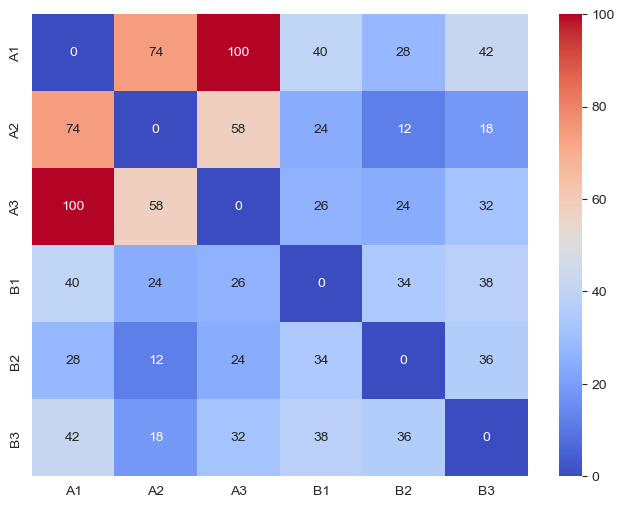

In [200]:
# List of valid relations
relations = ["A1", "A2", "A3", "B1", "B2", "B3"]

# Initialize the co-occurrence matrix with zeros
co_occurrence_matrix = pd.DataFrame(0, index=relations, columns=relations)

# Iterate over the rows of 'exploded_data' to calculate co-occurrences
for relation_list in filtered_data['relation']:
    for i in relation_list:
        for j in relation_list:
            if i != j and i in relations and j in relations:  # Exclude self-cooccurrences and ensure valid relations
                co_occurrence_matrix.loc[i, j] += 1 
                co_occurrence_matrix.loc[i, j] += 1

# Plot a heatmap for the co-occurrence matrix
plt.figure(figsize=(8, 6))
sns.heatmap(co_occurrence_matrix, annot=True, cmap='coolwarm', fmt="d")

# Show the plot
plt.show()